In [1]:
import json
import pickle
import lizard
import tempfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import heapq
import random

In [2]:
with open("./data/java_test_0.jsonl", "r") as json_f:
    ds = [json.loads(line) for line in json_f]

In [3]:
def compute_complexity(dataset_entry):
    code = dataset_entry["original_string"]
    with tempfile.NamedTemporaryFile(delete=False, suffix=".java", mode='w') as tmp:
        tmp.write(code)
        tmp_path = tmp.name

    analysis = lizard.analyze_file(tmp_path)
    os.remove(tmp_path)
    return max((f.cyclomatic_complexity for f in analysis.function_list), default=0)


In [4]:
l = [compute_complexity(entry) for entry in ds]

In [5]:
top_4 = heapq.nlargest(4, l)

print(top_4)

[531, 273, 206, 191]


In [6]:
serie = pd.Series(l)

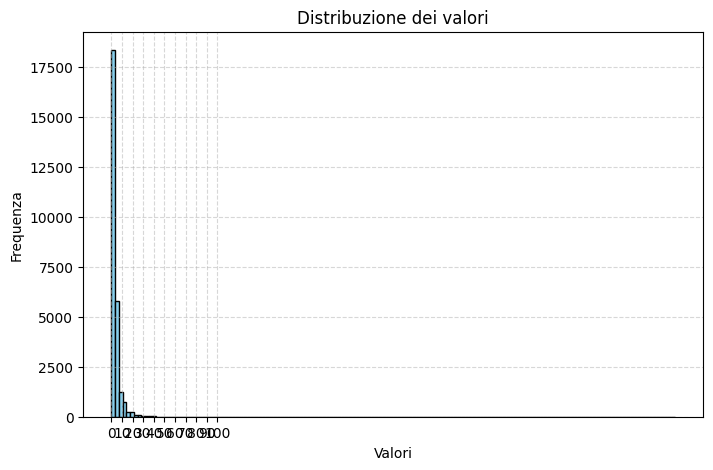

In [7]:
plt.figure(figsize=(8, 5))
plt.hist(serie, bins=150, edgecolor='black', color='skyblue')
plt.title("Distribuzione dei valori")
plt.xlabel("Valori")
plt.ylabel("Frequenza")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0, 109, 10))
plt.show()

In [8]:
for entry in ds:
    entry["cyclomatic_complexity"] = compute_complexity(entry)

In [9]:
filtered = [entry for entry in ds if 10 <= entry["cyclomatic_complexity"] <= 30]

sample = random.sample(filtered, k=min(4, len(filtered)))

In [10]:
for i, entry in enumerate(sample, 1):
    print(f"\n=== Entry {i} ===")
    print(f"Complexity: {entry['cyclomatic_complexity']}")
    print(f"Code:\n{entry['original_string']}")


=== Entry 1 ===
Complexity: 16
Code:
private String processQueryElements(String urlToFilter) {
        try {
            // Handle illegal characters by making a url first
            // this will clean illegal characters like |
            URL url = new URL(urlToFilter);

            String query = url.getQuery();
            String path = url.getPath();

            // check if the last element of the path contains parameters
            // if so convert them to query elements
            if (path.contains(";")) {
                String[] pathElements = path.split("/");
                String last = pathElements[pathElements.length - 1];
                // replace last value by part without params
                int semicolon = last.indexOf(";");
                if (semicolon != -1) {
                    pathElements[pathElements.length - 1] = last.substring(0,
                            semicolon);
                    String params = last.substring(semicolon + 1).replaceAll(
    

In [11]:
with open("./data/java_subset.json", "w") as output_f:
     json.dump({"samples":sample}, output_f)
    